# Explore here

In [1]:
#Librerias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos Dataset

df = pd.read_csv ("/Users/luiseduardogarciablanco/Desktop/bootcamp/K_Medias_project/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
#dejamos solo las columnas que nos indica el Ejercicio

df_housing = df[['MedInc', 'Latitude', 'Longitude']]
df_housing

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [4]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(df_housing, test_size=0.2, random_state=42)

print("Train Data:\n", X_train)
print("\nTest Data:\n", X_test)

Train Data:
        MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80
...       ...       ...        ...
11284  6.3700     33.78    -117.96
11964  3.0500     34.02    -117.43
5390   2.9344     34.03    -118.38
860    5.7192     37.58    -121.96
15795  2.5755     37.77    -122.42

[16512 rows x 3 columns]

Test Data:
        MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93
...       ...       ...        ...
15362  4.6050     33.36    -117.22
16623  2.7266     35.36    -120.83
18086  9.2298     37.31    -122.05
2144   2.7850     36.77    -119.76
3665   3.5521     34.22    -118.37

[4128 rows x 3 columns]


In [5]:
# Seleccionamos el número de clusters
k = 6

# Inicializamos y ajustamos el modelo K-means en el conjunto de entrenamiento
kmeans = KMeans(n_clusters=k, n_init= "auto", random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [6]:


# Obtenemos las etiquetas de los clusters para el conjunto de entrenamiento
X_train['Cluster'] = kmeans.labels_

# Predecimos los clusters para el conjunto de prueba
X_test['Cluster'] = kmeans.predict(X_test)
X_train


,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,3
5390,2.9344,34.03,-118.38,3
860,5.7192,37.58,-121.96,0


/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_15260/419984648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing.loc[X_train.index, 'Cluster'] = X_train['Cluster']


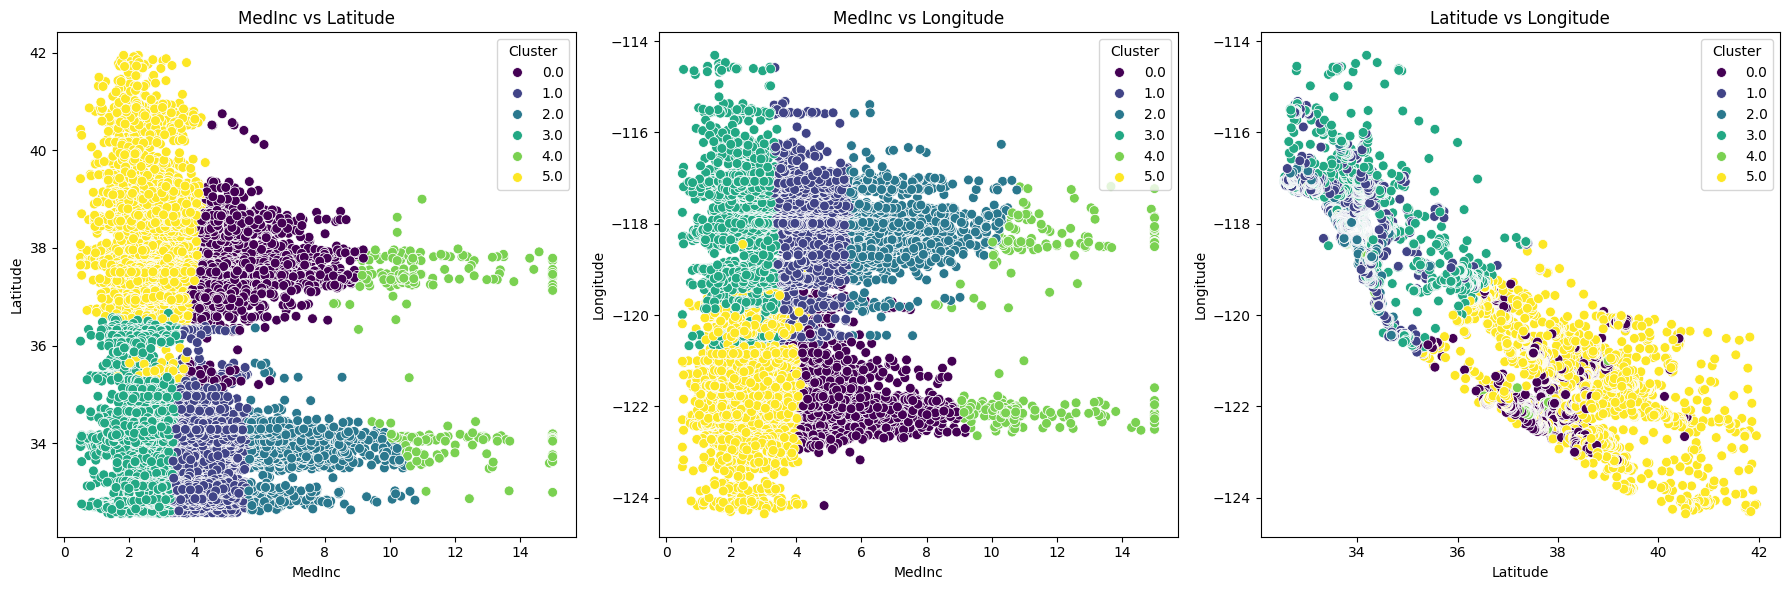

In [7]:
# Combinamos los conjuntos de entrenamiento 
df_housing.loc[X_train.index, 'Cluster'] = X_train['Cluster']


# Graficamos los resultados
plt.figure(figsize=(18, 6))

# Gráfico 1: MedInc vs Latitude
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_housing, x='MedInc', y='Latitude', hue='Cluster', palette='viridis', s=50)
plt.title('MedInc vs Latitude')
plt.xlabel('MedInc')
plt.ylabel('Latitude')

# Gráfico 2: MedInc vs Longitude
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_housing, x='MedInc', y='Longitude', hue='Cluster', palette='viridis', s=50)
plt.title('MedInc vs Longitude')
plt.xlabel('MedInc')
plt.ylabel('Longitude')

# Gráfico 3: Latitude vs Longitude
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_housing, x='Latitude', y='Longitude', hue='Cluster', palette='viridis', s=50)
plt.title('Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Ahora utiliza el modelo entrenado con el conjunto test y añade los puntos al gráfico anterior para confirmar que la predicción es satisfactoria

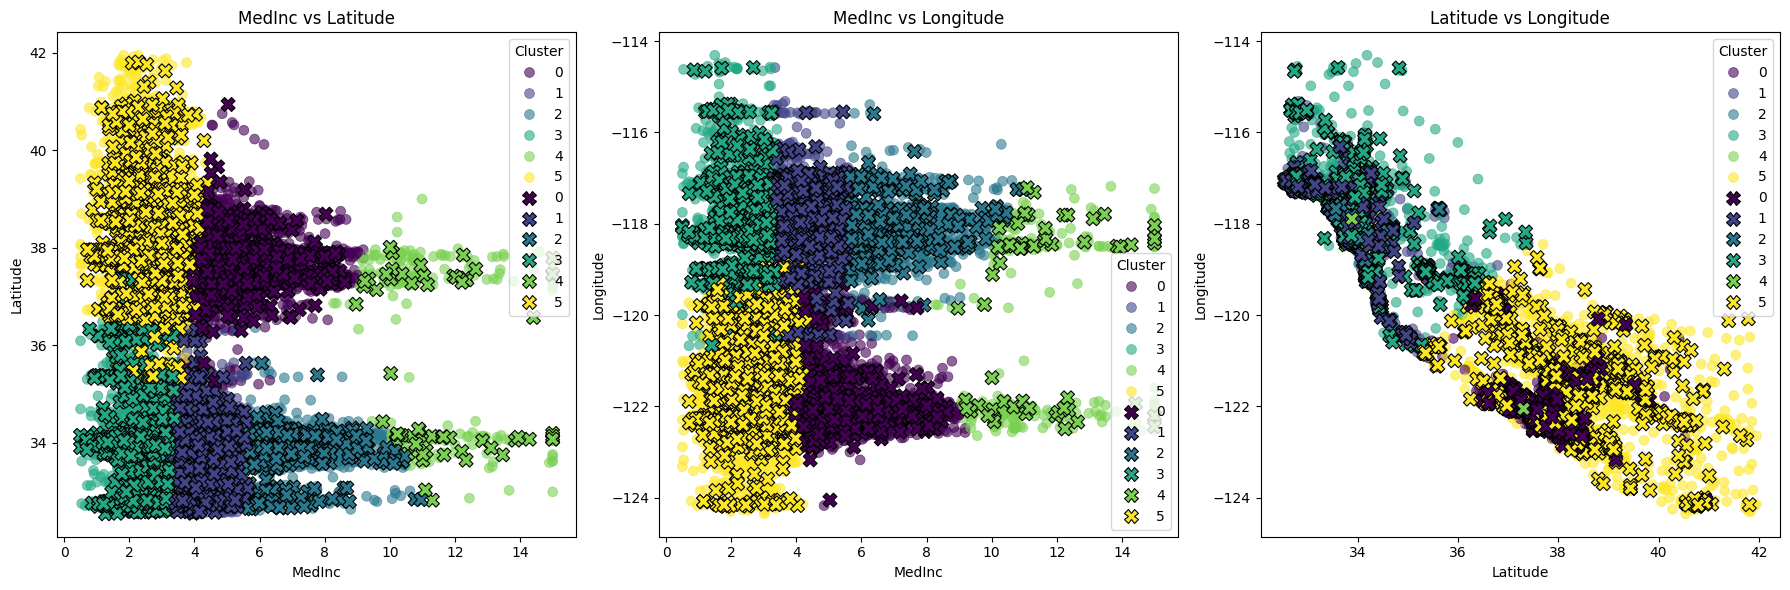

In [11]:
# Combinamos los conjuntos de entrenamiento y prueba para análisis posterior
df_housing.loc[X_train.index, 'Cluster'] = X_train['Cluster']
df_housing.loc[X_test.index, 'Cluster'] = X_test['Cluster']

# Graficamos los resultados
plt.figure(figsize=(18, 6))

# Gráfico 1: MedInc vs Latitude
plt.subplot(1, 3, 1)
sns.scatterplot(data=X_train, x='MedInc', y='Latitude', hue='Cluster', palette='viridis', s=50, alpha=0.6, edgecolor=None)
sns.scatterplot(data=X_test, x='MedInc', y='Latitude', hue='Cluster', palette='viridis', s=100, marker='X', edgecolor='black')
plt.title('MedInc vs Latitude')
plt.xlabel('MedInc')
plt.ylabel('Latitude')

# Gráfico 2: MedInc vs Longitude
plt.subplot(1, 3, 2)
sns.scatterplot(data=X_train, x='MedInc', y='Longitude', hue='Cluster', palette='viridis', s=50, alpha=0.6, edgecolor=None)
sns.scatterplot(data=X_test, x='MedInc', y='Longitude', hue='Cluster', palette='viridis', s=100, marker='X', edgecolor='black')
plt.title('MedInc vs Longitude')
plt.xlabel('MedInc')
plt.ylabel('Longitude')

# Gráfico 3: Latitude vs Longitude
plt.subplot(1, 3, 3)
sns.scatterplot(data=X_train, x='Latitude', y='Longitude', hue='Cluster', palette='viridis', s=50, alpha=0.6, edgecolor=None)
sns.scatterplot(data=X_test, x='Latitude', y='Longitude', hue='Cluster', palette='viridis', s=100, marker='X', edgecolor='black')
plt.title('Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

como podemos observar, la prediccion del cluster en el conjunto Test ha sido muy buena

Ahora entrenaremos un modelo de clasificacion supervisada, empezaremos con un modelo de Random Forest que es robusto y no requiere demasiada afinación de parámetros.

In [12]:
#rescatamos el Df original y añadimos la columna cluster de nuevo a todo el Dataset

# Seleccionamos el número de clusters
k = 6

# Inicializamos y ajustamos el modelo K-means en el conjunto de entrenamiento
kmeans = KMeans(n_clusters=k, n_init= "auto", random_state=42)
kmeans.fit(df_housing)

KMeans(n_clusters=6, random_state=42)

In [15]:
# Obtenemos las etiquetas de los clusters para el todo el conjunto
df_housing['Cluster'] = kmeans.labels_
df_housing

/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_15260/3778985384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing['Cluster'] = kmeans.labels_


,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,1
...,...,...,...,...
20635,1.5603,39.48,-121.09,1
20636,2.5568,39.49,-121.21,1
20637,1.7000,39.43,-121.22,1
20638,1.8672,39.43,-121.32,1


In [16]:
# Dividimos los datos en características (X) y etiquetas (y)
X = df_housing[['MedInc', 'Latitude', 'Longitude']]
y = df_housing['Cluster']

In [27]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializamos y ajustamos el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# Predecimos los clusters en el conjunto de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculamos la precisión (accuracy) en ambos conjuntos
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}")
print(f"Accuracy en el conjunto de prueba: {accuracy_test:.4f}")

Accuracy en el conjunto de entrenamiento: 1.0000
Accuracy en el conjunto de prueba: 0.9956


In [31]:
#hagamos u gridsearch para ajustar parametros ya que hay overfitting en el entrenamiento
# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializamos GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=1, verbose=2, scoring='accuracy')

# Ajustamos GridSearchCV
grid_search.fit(X_train, y_train)

# Obtenemos los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecimos los clusters en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Calculamos la precisión (accuracy) en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Mejores hiperparámetros encontrados: {best_params}")
print(f"Accuracy en el conjunto de prueba con los mejores hiperparámetros: {accuracy_test:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END ma

In [48]:
# Inicializamos y ajustamos el modelo Random Forest con hiperparametros encontrados
rf_model = RandomForestClassifier(max_depth= 20, min_samples_leaf=1, min_samples_split=5, n_estimators=100, criterion='gini' , random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [49]:
#comprobamos modelo con nuevos hiperparametros
# Predecimos los clusters en el conjunto de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculamos la precisión (accuracy) en ambos conjuntos
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}")
print(f"Accuracy en el conjunto de prueba: {accuracy_test:.4f}")

Accuracy en el conjunto de entrenamiento: 0.9999
Accuracy en el conjunto de prueba: 0.9956


In [50]:
#guardamos ambos modelos
import joblib
# Guardar el modelo K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')
#guardamos modelo Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']